In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
data=pd.read_csv('bigdaysale.csv')
data.head(111)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1000022,P00021742,M,18-25,15,A,4+,0,5,NaN,NaN,6973
107,1000022,P00313042,M,18-25,15,A,4+,0,5,14.0,NaN,5168
108,1000022,P00133742,M,18-25,15,A,4+,0,5,14.0,NaN,3449
109,1000022,P00077042,M,18-25,15,A,4+,0,5,NaN,NaN,7177


In [7]:
data.shape

(550068, 12)

In [8]:
data.info


<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0     

In [9]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [11]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

C:\Users\91767\AppData\Local\Temp\ipykernel_1248\2994175138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Purchase'],color='green')


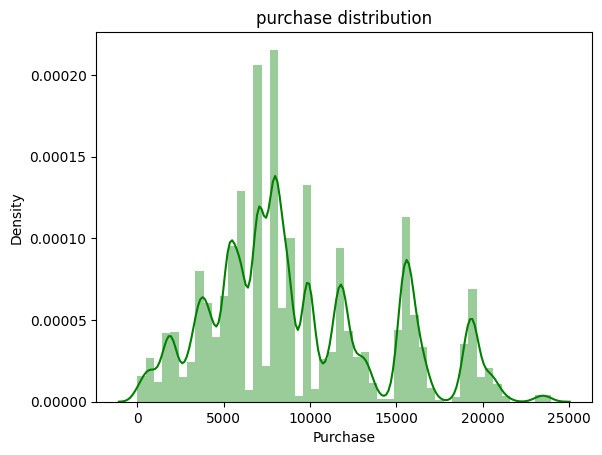

In [12]:
sns.distplot(data['Purchase'],color='green')
plt.title("purchase distribution")
plt.show()

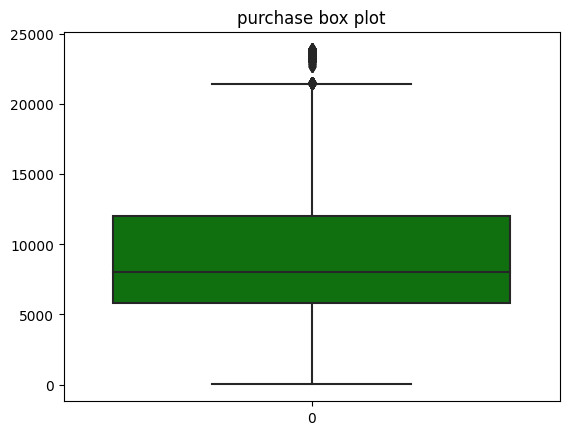

In [13]:
sns.boxplot(data['Purchase'],color='green')
plt.title('purchase box plot')
plt.show()

In [14]:
data['Purchase'].skew()

0.6001400037087128

In [15]:
data['Purchase'].kurtosis

<bound method NDFrame._add_numeric_operations.<locals>.kurt of 0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64>

In [16]:
data['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [17]:
data['Gender'].describe()

count     550068
unique         2
top            M
freq      414259
Name: Gender, dtype: object

C:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


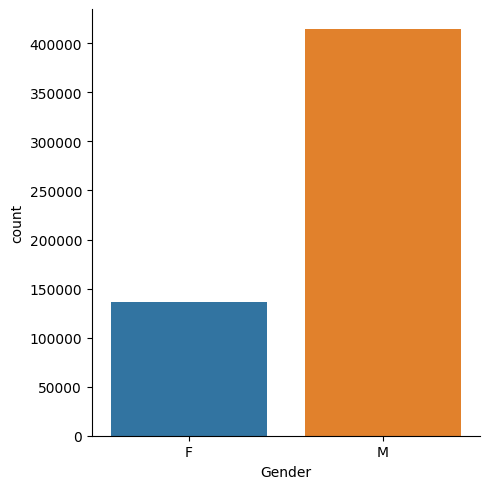

In [18]:
sns.catplot(x='Gender', data = data, kind = 'count')


In [19]:
data['Gender'].value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

In [20]:
data.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

C:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


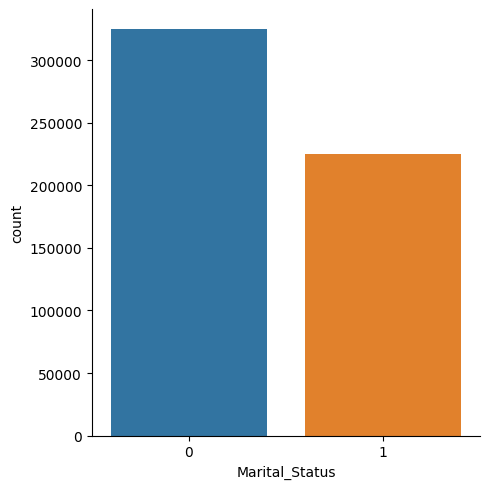

In [21]:
sns.catplot(x='Marital_Status', data = data, kind = 'count')


In [22]:
data.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

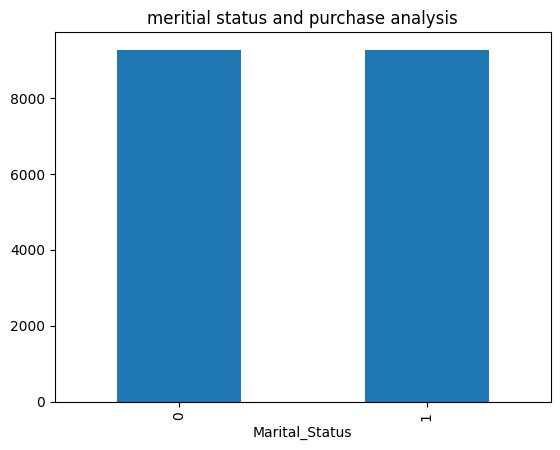

In [23]:
data.groupby('Marital_Status')['Purchase'].mean().plot(kind='bar')
plt.title('meritial status and purchase analysis')
plt.show()

C:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2800x1500 with 0 Axes>

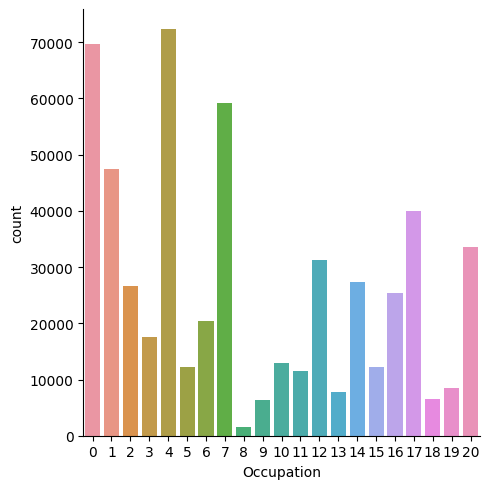

In [24]:
plt.figure(figsize=(28,15))
sns.catplot(x='Occupation', data = data, kind = 'count')
plt.show()

In [25]:
occ=pd.DataFrame(data.groupby('Occupation')['Purchase'].mean())
occ

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


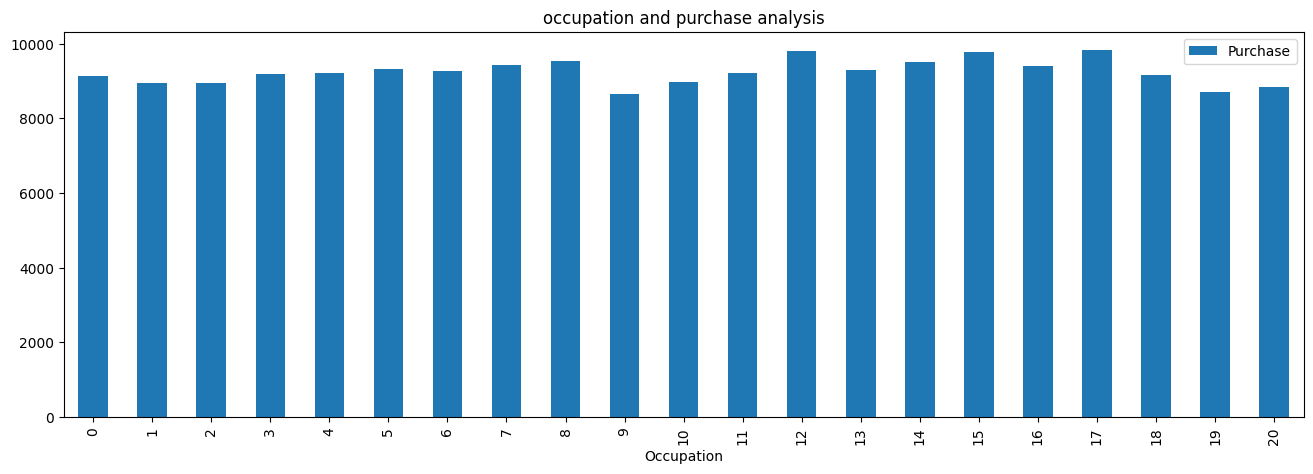

In [26]:
occ.plot(kind='bar',figsize=(16,5))
plt.title('occupation and purchase analysis')
plt.show()

C:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


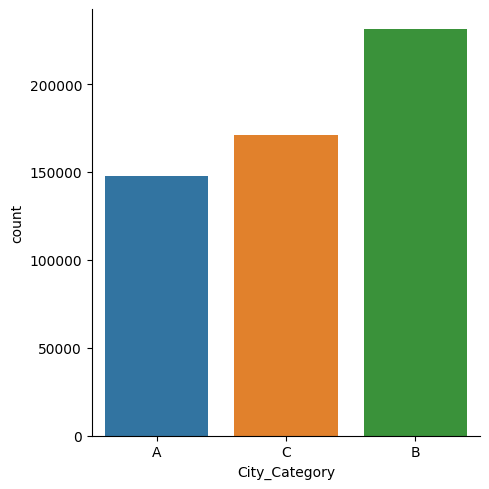

In [27]:
sns.catplot(x='City_Category', data = data, kind = 'count')
plt.show()

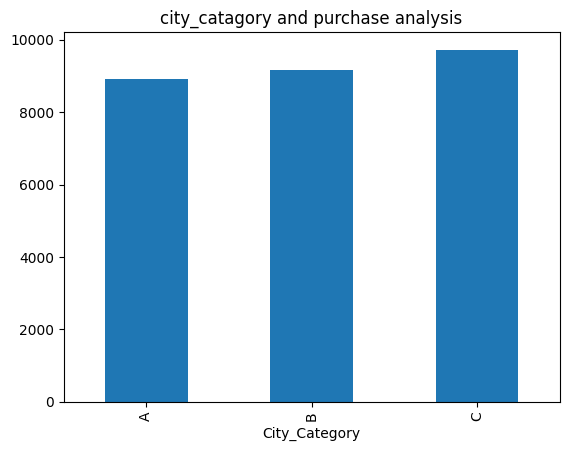

In [28]:
data.groupby('City_Category')['Purchase'].mean().plot(kind='bar')
plt.title('city_catagory and purchase analysis')
plt.show()

C:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


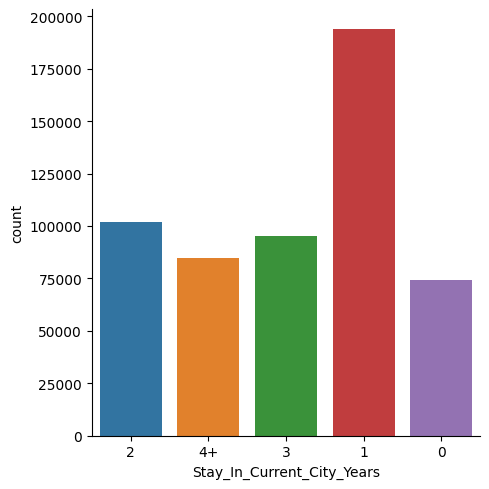

In [29]:
sns.catplot(x='Stay_In_Current_City_Years', data = data, kind = 'count')
plt.show()

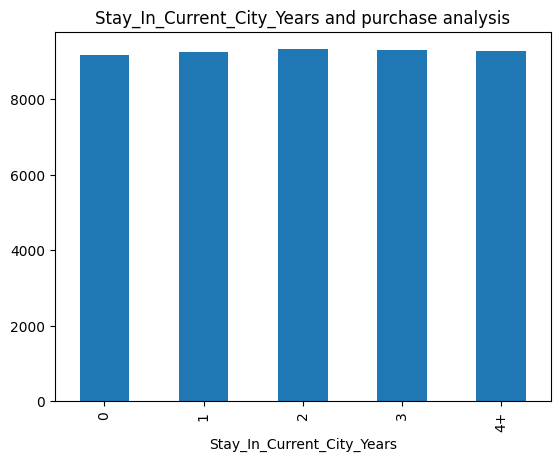

In [30]:
data.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind='bar')
plt.title('Stay_In_Current_City_Years and purchase analysis')
plt.show()

C:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


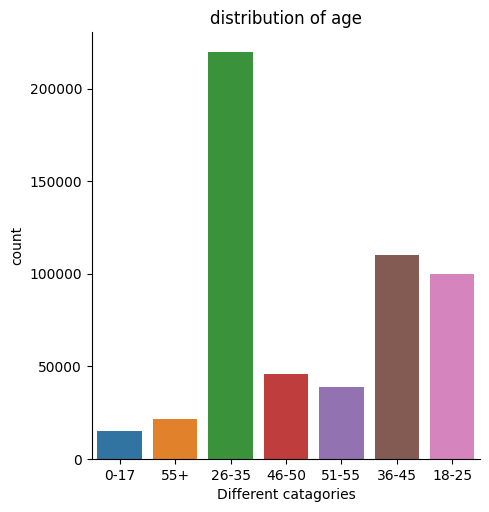

In [31]:
sns.catplot(x='Age', data = data, kind = 'count')
plt.title('distribution of age')
plt.xlabel('Different catagories')
plt.show()

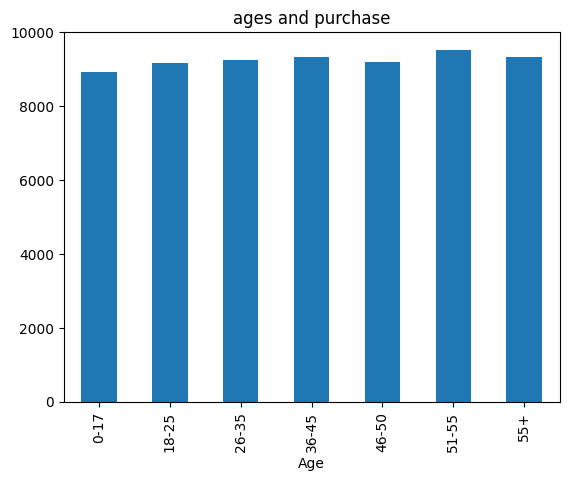

In [32]:
data.groupby('Age')['Purchase'].mean().plot(kind='bar')
plt.title('ages and purchase')
plt.show()

<Axes: xlabel='Age'>

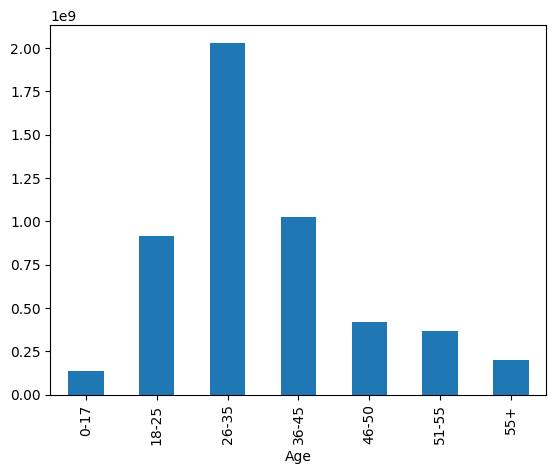

In [33]:
data.groupby('Age')['Purchase'].sum().plot(kind='bar')

C:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x500 with 0 Axes>

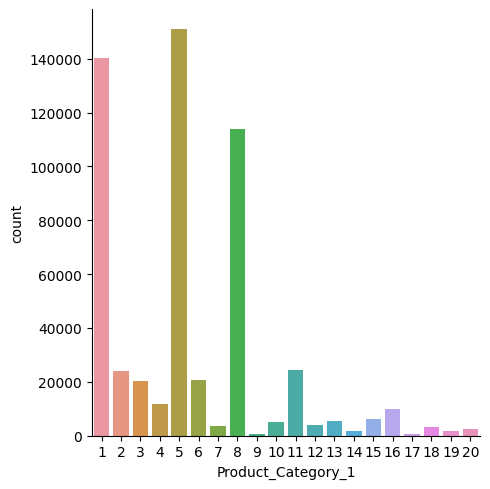

In [34]:
plt.figure(figsize=(18,5))
sns.catplot(x='Product_Category_1',data=data,kind='count')
plt.show()

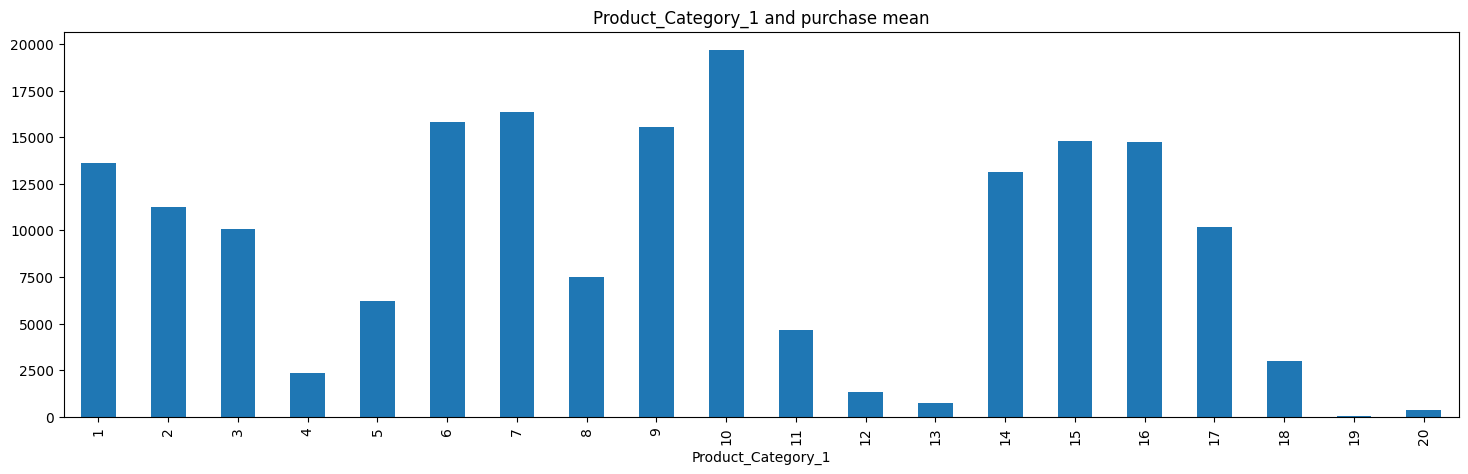

In [35]:
data.groupby('Product_Category_1')['Purchase'].mean().plot(kind='bar',figsize=(18,5))
plt.title('Product_Category_1 and purchase mean')
plt.show()

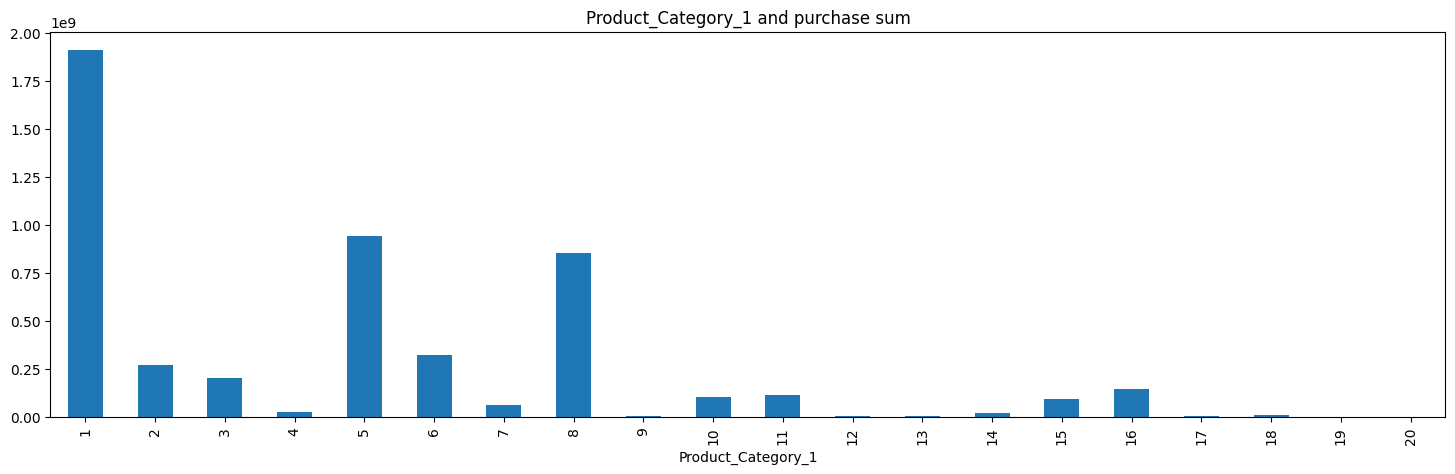

In [36]:
data.groupby('Product_Category_1')['Purchase'].sum().plot(kind='bar',figsize=(18,5))
plt.title('Product_Category_1 and purchase sum')
plt.show()

C:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x500 with 0 Axes>

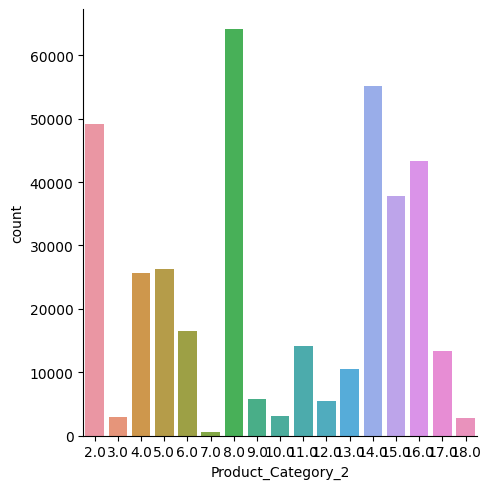

In [37]:
plt.figure(figsize=(18,5))
sns.catplot(x='Product_Category_2',data=data,kind='count')
plt.show()

C:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 6800x500 with 0 Axes>

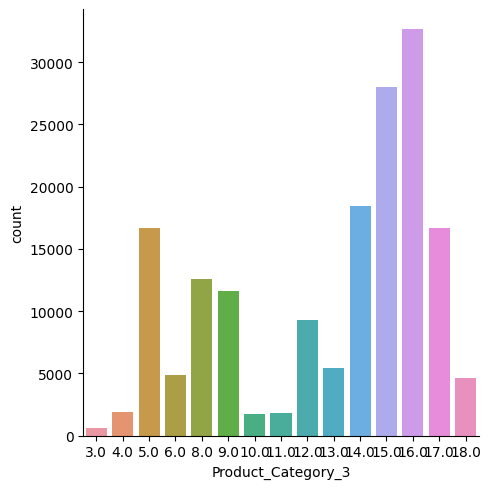

In [38]:
plt.figure(figsize=(68,5))
sns.catplot(x='Product_Category_3',data=data,kind='count')
plt.show()

In [39]:
data['Product_ID']=data['Product_ID'].str.replace('P00','')
ss=StandardScaler()
data['Product_ID']=ss.fit_transform(data['Product_ID'].values.reshape(-1,1))

In [40]:
data.drop(['Product_Category_3'],axis=1,inplace=True)

In [41]:
data['Product_Category_2']=data['Product_Category_2'].fillna(data['Product_Category_2'].mean())

In [42]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [43]:
data.dtypes

User_ID                         int64
Product_ID                    float64
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [44]:
cat_cols=['City_Category','Gender','Age']
le=LabelEncoder()
for i in cat_cols:
    data[i]=le.fit_transform(data[i])
    data.dtypes

In [45]:
data.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [46]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].replace('4+','4')

In [47]:
data['Gender']=data['Gender'].astype(int)
data['Age']=data['Age'].astype(int)
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(int)

In [48]:
data['City_Category']=data['City_Category'].astype('category')

In [49]:
data


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,1,20,9.842329,368
550064,1006035,1.953267,0,2,1,2,3,0,20,9.842329,371
550065,1006036,1.953267,0,2,15,1,4,1,20,9.842329,137
550066,1006038,1.953267,0,6,1,2,2,0,20,9.842329,365


In [50]:
data.dtypes

User_ID                          int64
Product_ID                     float64
Gender                           int32
Age                              int32
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years       int32
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Purchase                         int64
dtype: object

In [51]:
data.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1.000000,-0.017619,-0.033474,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.001267,0.004716
Product_ID,-0.017619,1.000000,0.021084,0.028892,0.009344,0.010162,-0.003162,0.013194,0.090193,0.027393,-0.103961
Gender,-0.033474,0.021084,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.015300,0.060346
Age,0.032698,0.028892,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.045185,0.015839
Occupation,-0.023971,0.009344,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,-0.000317,0.020833
City_Category,0.022859,0.010162,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,-0.009777,0.061914
Stay_In_Current_City_Years,-0.030737,-0.003162,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,-0.001368,0.005422
Marital_Status,0.020443,0.013194,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.012507,-0.000463
Product_Category_1,0.003825,0.090193,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,0.373686,-0.343703
Product_Category_2,0.001267,0.027393,-0.015300,0.045185,-0.000317,-0.009777,-0.001368,0.012507,0.373686,1.000000,-0.179309


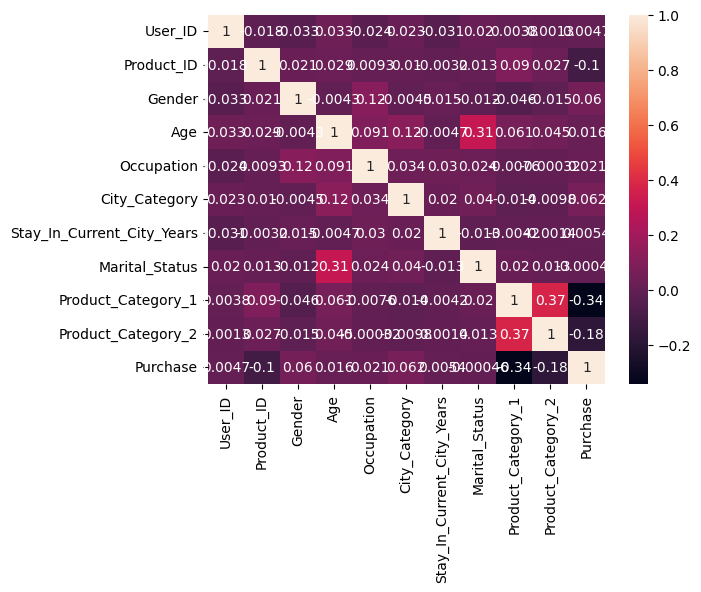

In [52]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [53]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [54]:
df=data.copy()

In [55]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969


In [91]:
X = data.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = data['Purchase']

In [98]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(X_train, y_train)
    
    # predict the results
    pred = model.predict(X_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

Results
MSE: 4996.78872971161
CV Score: 5004.8787392642525


<Axes: title={'center': 'Model Coefficients'}>

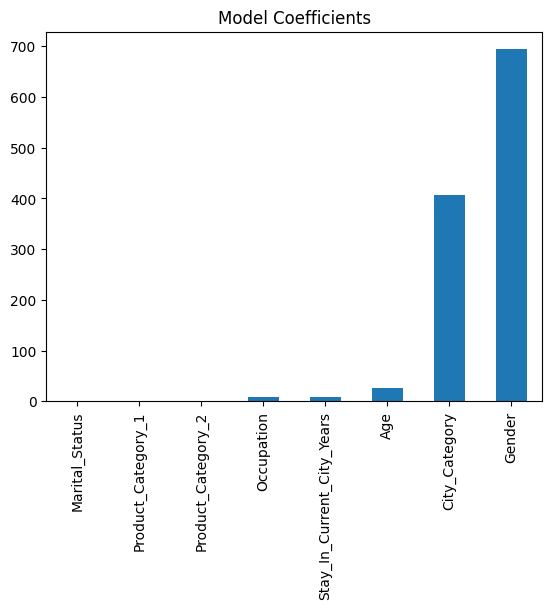

In [99]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(positive=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 3171.1616532166995
CV Score: 3150.812011374554


<Axes: title={'center': 'Feature Importance'}>

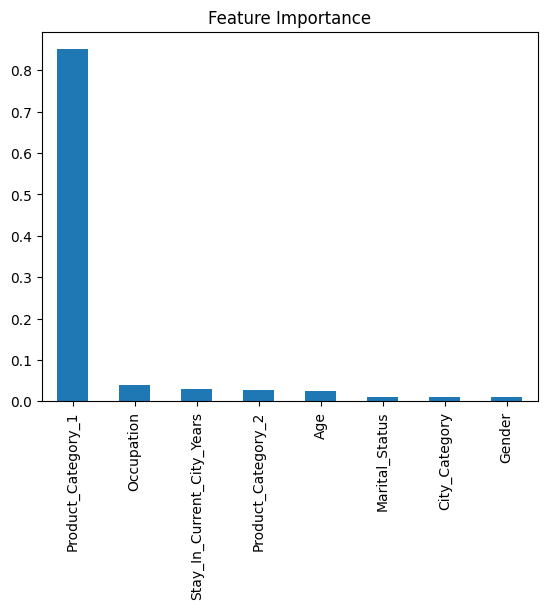

In [100]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3031.2381452120926
CV Score: 3018.5086828862377


<Axes: title={'center': 'Feature Importance'}>

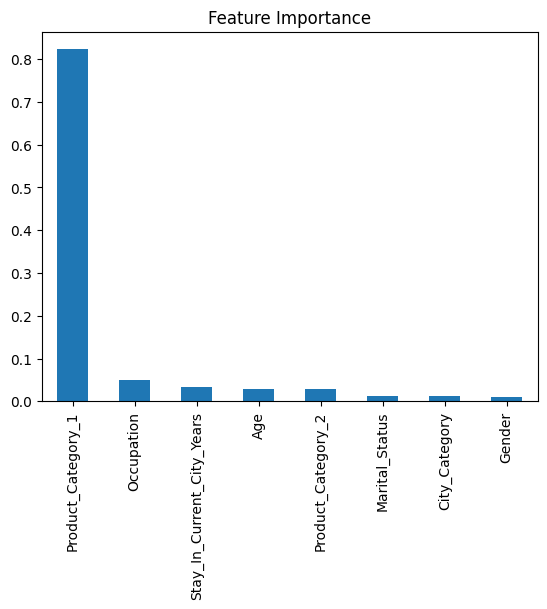

In [101]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3101.149397935572
CV Score: 3083.556720371105


<Axes: title={'center': 'Feature Importance'}>

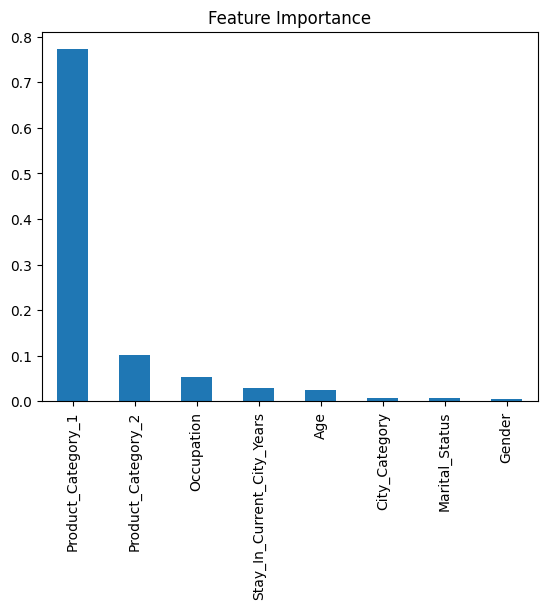

In [102]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [106]:
submission = pd.DataFrame()
submission['User_ID'] = X_test['User_ID']
submission['Purchase'] = pred

NameError: name 'X_test' is not defined

In [107]:
submission.to_csv('submission.csv', index=False)